# Line Plot

In [70]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
import pandas as pd 
import sys 

sys.path.append('../')

import omdutils as omd # custom functions

pd.options.display.max_columns = None

In [64]:
sql = 'SELECT * FROM titanic_train'
db = '../SourceData/datasets.db'
df_titanic = omd.from_sqlite(sql, db)
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,,1,2,W./C. 6607,23.4500,,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [65]:
# df_titanic = df_titanic[df_titanic['Fare'] < 500]
x_values = df_titanic['Survived']
y_values = df_titanic['Fare']

trace0 = go.Box(x=x_values, 
                y=y_values, 
                boxpoints='all',  # Show individual data points
                jitter=0.3,       # Add some jitter for better visibility
                pointpos=-1.8,    # Position of data points relative to the box
                name='Fare')

data = [trace0]

layout = go.Layout(title='Box plot of Fare by Survived',
                   title_x=0.5,
                   xaxis=dict(title='Survived'),
                   yaxis=dict(title='Fare'))

fig = go.Figure(data=data, layout=layout)
fig.show()

In [66]:
# Calculate the survival rate by Pclass
survival_rate_by_pclass = df_titanic.groupby('Pclass')['Survived'].mean()

# Prepare data for the bar plot
x_values = survival_rate_by_pclass.index
y_values = survival_rate_by_pclass.values

# Create the bar plot
trace = go.Bar(x=x_values, y=y_values, name='Survival Rate')

# Create the layout
layout = go.Layout(
    title='Survival Rate by Passenger Class',
    title_x=0.5,
    xaxis=dict(title='Passenger Class'),
    yaxis=dict(title='Survival Rate')
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


In [67]:
sql = 'SELECT * FROM air_passengers'
db = 'Datasets'
df_air_passengers = omd.from_postgres(sql, db)
df_air_passengers.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [118]:
x_values = df_air_passengers['Month']
y_values = df_air_passengers['Passengers']

trace0 = go.Scatter(
    x=x_values, 
    y=y_values, 
    mode='lines+markers', 
    name='Passengers',
    line=dict(color='#1f77b4'),  
    marker=dict(color='#1f77b4') 
)

data = [trace0]

layout = go.Layout(title='Airline Passengers over Time',
                   title_x=0.5,
                   xaxis=dict(title='Month'),
                   yaxis=dict(title='Number of Passengers'))

fig = go.Figure(data=data, layout=layout)
fig.show()


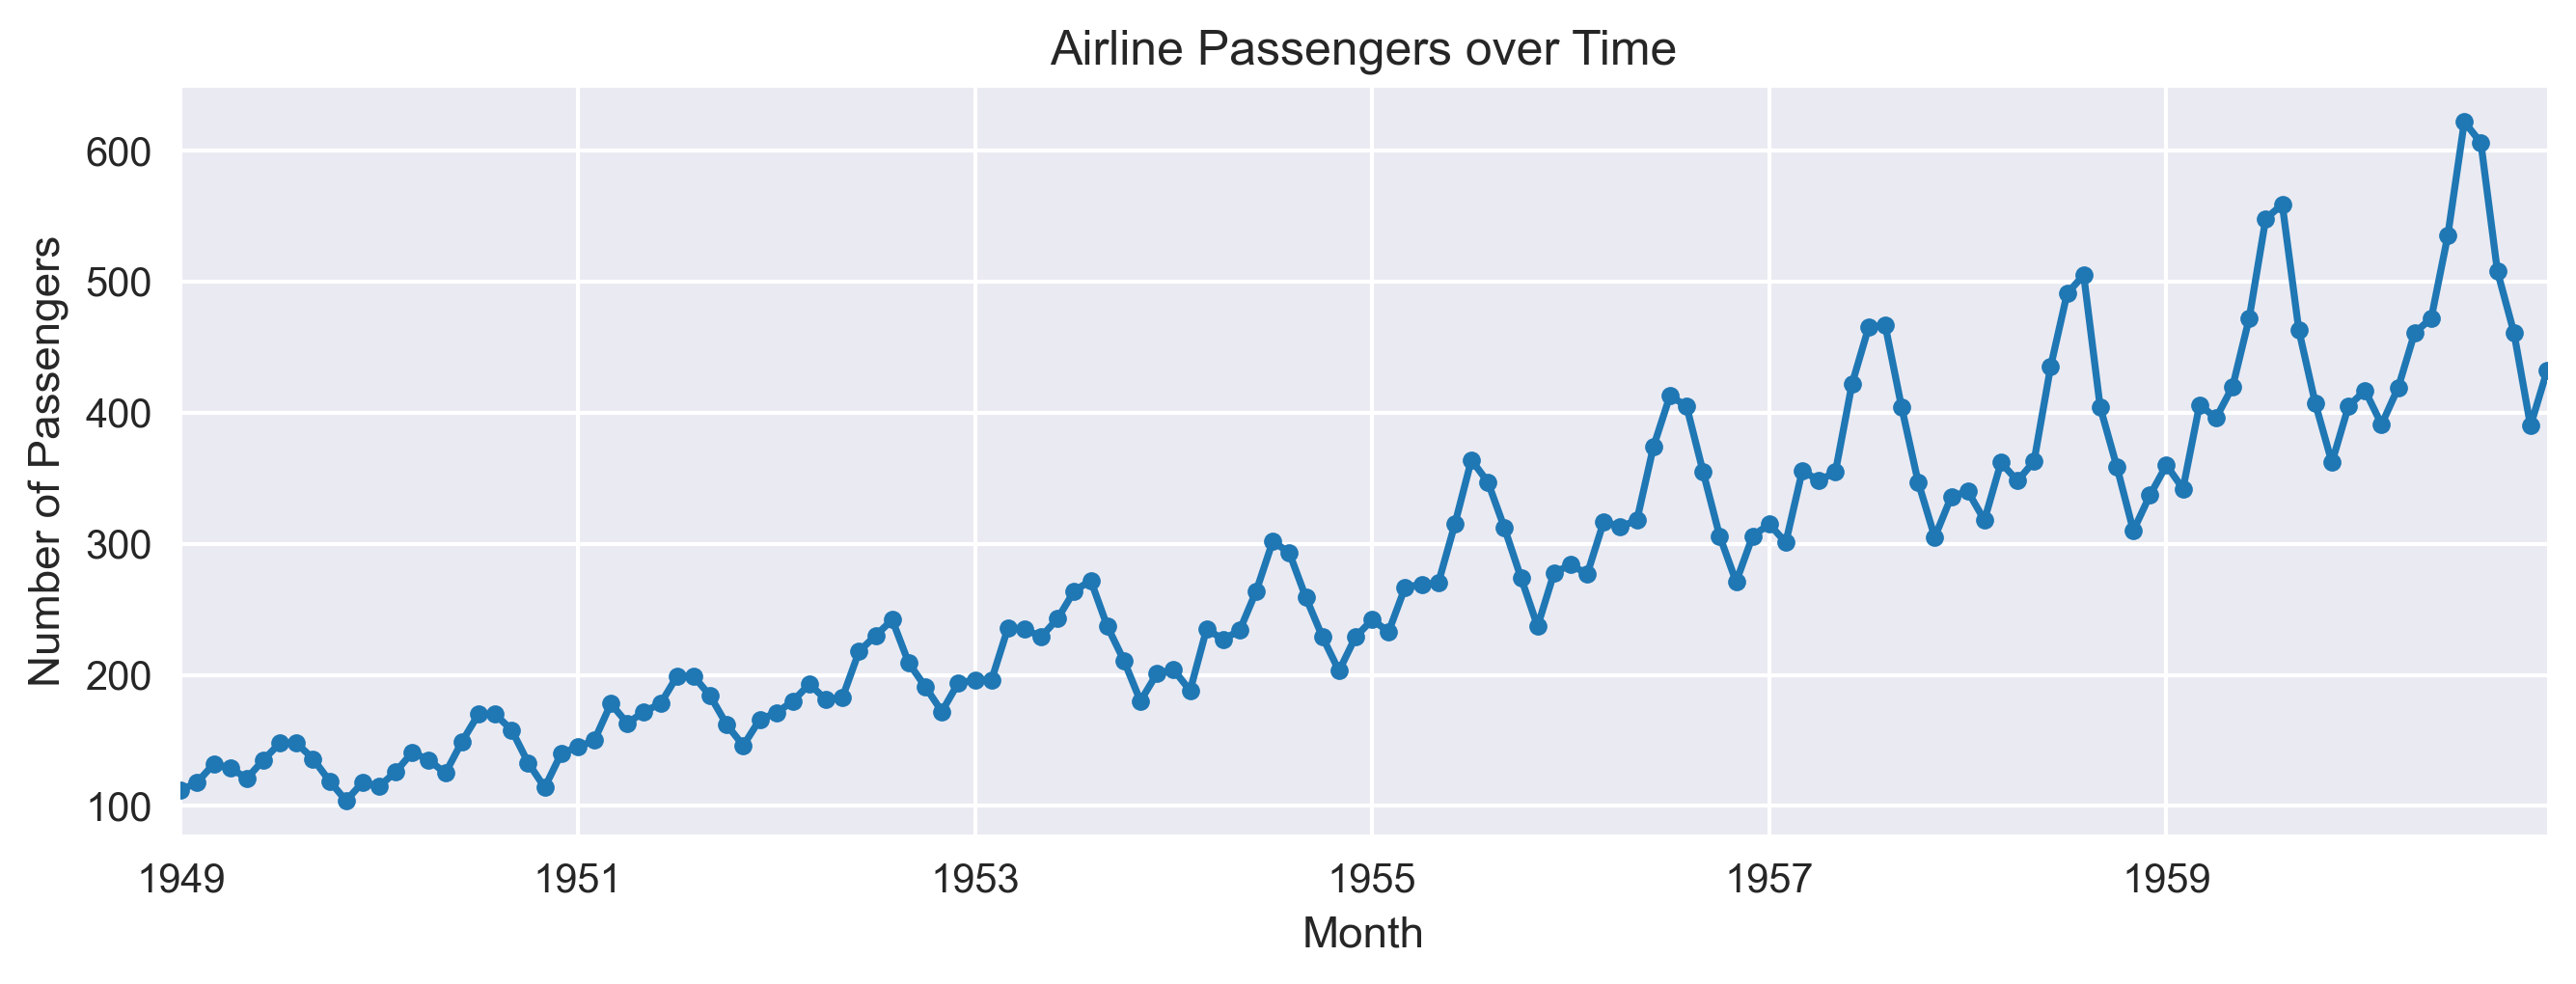

In [128]:
import matplotlib.pyplot as plt 

# df_air_passengers.index = pd.to_datetime(df_air_passengers['Month'])
plt.style.use('seaborn-v0_8')
plt.figure(dpi=300)

df_air_passengers['Passengers'].plot(marker='o', ms=4.5 ,figsize=(9, 3.5),
                                     color='#1f77b4', 
                                     title='Airline Passengers over Time')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

In [93]:
# df = pd.read_csv('../SourceData/nst-est2017-alldata.csv')
# omd.to_sqlite(df, 'us_census', '../SourceData/datasets.db')
# omd.to_postgres(df, 'us_census', 'Datasets')

df = omd.from_sqlite('SELECT * FROM us_census', '../SourceData/datasets.db')
print(df.shape)
df.head()

(59, 121)


,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,DEATHS2016,DEATHS2017,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,NATURALINC2016,NATURALINC2017,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,INTERNATIONALMIG2017,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016,DOMESTICMIG2017,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,NETMIG2015,NETMIG2016,NETMIG2017,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016,RESIDUAL2017,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RBIRTH2016,RBIRTH2017,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RDEATH2017,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017
0,10.0,0,0,0.0,United States,308745538.0,308758105.0,309338421.0,311644280.0,313993272.0,316234505.0,318622525.0,321039839.0,323405935.0,325719178.0,580316.0,2305859.0,2348992.0,2241233.0,2388020.0,2417314.0,2366096.0,2313243.0,987836.0,3973485.0,3936976.0,3940576.0,3963195.0,3992376.0,3962714.0,3946000.0,598691.0,2512442.0,2501531.0,2608019.0,2582448.0,2699826.0,2728714.0,2744040.0,389145.0,1461043.0,1435445.0,1332557.0,1380747.0,1292550.0,1234000.0,1201960.0,191171.0,844816.0,913547.0,908676.0,1007273.0,1124764.0,1132096.0,1111283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191171.0,844816.0,913547.0,908676.0,1007273.0,1124764.0,1132096.0,1111283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.797410,12.585485,12.505244,12.485315,12.482760,12.298053,12.157903,8.091826,7.996742,8.276433,8.135526,8.441410,8.468405,8.454580,4.705584,4.588743,4.228811,4.349789,4.041351,3.829647,3.703323,2.720900,2.920371,2.883643,3.173228,3.516743,3.513394,3.423941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.720900,2.920371,2.883643,3.173228,3.516743,3.513394,3.423941
1,20.0,1,0,0.0,Northeast Region,55317240.0,55318350.0,55388349.0,55642659.0,55860261.0,56047732.0,56203078.0,56296628.0,56359360.0,56470581.0,69999.0,254310.0,217602.0,187471.0,155346.0,93550.0,62732.0,111221.0,163452.0,646252.0,637891.0,635767.0,632435.0,634515.0,625336.0,621245.0,110732.0,470885.0,460988.0,479828.0,470012.0,488936.0,488935.0,493164.0,52720.0,175367.0,176903.0,155939.0,162423.0,145579.0,136401.0,128081.0,53255.0,242627.0,247800.0,252246.0,269864.0,292452.0,299191.0,297343.0,-32698.0,-161133.0,-204362.0,-218345.0,-274513.0,-343298.0,-372840.0,-313643.0,20557.0,81494.0,43438.0,33901.0,-4649.0,-50846.0,-73649.0,-16300.0,-3278.0,-2551.0,-2739.0,-2369.0,-2428.0,-1183.0,-20.0,-560.0,11.640928,11.441691,11.362316,11.268248,11.280296,11.101691,11.012059,8.482045,8.268627,8.575402,8.374318,8.692218,8.680142,8.741722,3.158883,3.173065,2.786914,2.893930,2.588078,2.421549,2.270337,4.370437,4.444727,4.508096,4.808233,5.199160,5.311586,5.270640,-2.902486,-3.665590,-3.902223,-4.891065,-6.103092,-6.619089,-5.559570,1.467950,0.779137,0.605873,-0.082832,-0.903931,-1.307503,-0.288930
2,20.0,2,0,0.0,Midwest Region,66927001.0,66929794.0,66973360.0,67141501.0,67318295.0,67534451.0,67720120.0,67839187.0,67978168.0

In [94]:
df2 = df[df['DIVISION'] == '1'] # Filter on the New England states
df2 = df2.set_index('NAME')
df2 = df2[[i for i in df2.columns if i[:3]=='POP']] # Select only the population columns
df2

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
NAME,,,,,,,,
Connecticut,3580171.0,3591927.0,3597705.0,3602470.0,3600188.0,3593862.0,3587685.0,3588184.0
Maine,1327568.0,1327968.0,1328101.0,1327975.0,1328903.0,1327787.0,1330232.0,1335907.0
Massachusetts,6564943.0,6612178.0,6659627.0,6711138.0,6757925.0,6794002.0,6823721.0,6859819.0
New Hampshire,1316700.0,1318345.0,1320923.0,1322622.0,1328684.0,1330134.0,1335015.0,1342795.0
Rhode Island,1053169.0,1052154.0,1052761.0,1052784.0,1054782.0,1055916.0,1057566.0,1059639.0
Vermont,625842.0,626210.0,625606.0,626044.0,625665.0,624455.0,623354.0,623657.0


In [95]:
data = [go.Scatter(x=[i[-4:] for i in df2.columns], 
                   y=df2.loc[state], 
                   mode='lines+markers', 
                   name=state) for state in df2.index]

layout = go.Layout(title='Population Estimates for New England States',
                   title_x=0.5,
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Population'))

fig = go.Figure(data=data, layout=layout)
fig.show()

In [2]:
np.random.seed(56)
x_values = np.linspace(0, 1, 100) # 100 evenly spaced values
y_values = np.random.randn(100)   # 100 random values

In [7]:
# create traces
trace0 = go.Scatter(
    x = x_values,
    y = y_values+7,
    mode = 'markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = x_values,
    y = y_values,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = x_values,
    y = y_values-7,
    mode = 'lines',
    name = 'lines'
)
data = [trace0, trace1, trace2]  # assign traces to data
layout = go.Layout(
    title = 'Line chart showing three different modes',
    title_x = 0.5,
    title_font = dict(size=24),
    xaxis=dict(title='X-axis', titlefont=dict(size=18)),
    yaxis=dict(title='Y-axis', titlefont=dict(size=18)),
    height=600,
)
fig = go.Figure(data=data,layout=layout)
# pyo.plot(fig, filename='line1.html')

In [8]:
fig.show()